In [1]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.data_preparation.sharpness_assessment import (
    calculate_gradient_based_sharpness,
    laplacian_sharpness,
    edge_sharpness,
    tenengrad_sharpness,
    fft_sharpness,
    contrast_sharpness
)

# Function to sample images from each class folder
def sample_images_from_class_folder(class_folder, num_samples=5):
    all_images = os.listdir(class_folder)
    sampled_images = random.sample(all_images, num_samples)
    return [os.path.join(class_folder, img) for img in sampled_images]

# Function to process and plot the sharpness comparison grouped by sharpness method
def compare_sharpness_methods_grouped(image_paths):
    sharpness_methods = {
        "Gradient-based": calculate_gradient_based_sharpness,
        "Laplacian-based": laplacian_sharpness,
        "Edge-based": edge_sharpness,
        "Tenengrad-based": tenengrad_sharpness,
        "FFT-based": fft_sharpness,
        "Contrast-based": contrast_sharpness
    }

    num_methods = len(sharpness_methods)
    num_images = len(image_paths)
    
    fig, axes = plt.subplots(num_methods, num_images, figsize=(5 * num_images, 5 * num_methods))
    
    for j, (method_name, sharpness_function) in enumerate(sharpness_methods.items()):
        for i, image_path in enumerate(image_paths):
            image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            sharpness_value = sharpness_function(image)
            ax = axes[j, i]
            ax.imshow(image, cmap='gray')
            ax.axis('off')
            ax.set_title(f"{method_name}\nSharpness: {sharpness_value:.2f}")
    
    plt.tight_layout()
    plt.show()

# Function to process and plot the sharpness comparison for a sample of images from a specific class
def compare_sharpness_for_class(class_folder, class_name, num_samples=5):
    print(f"------------------ Sharpness Comparison for {class_name} Class ------------------")
    sampled_images = sample_images_from_class_folder(class_folder, num_samples)
    compare_sharpness_methods_grouped(sampled_images)

# Main function to perform the sharpness comparison across all classes in the dataset
def compare_sharpness_across_classes(dataset_path, num_samples=5):
    class_folders = {
        "clear": os.path.join(dataset_path, "clear"),
        "cloudy": os.path.join(dataset_path, "cloudy"),
        "amber": os.path.join(dataset_path, "amber")
    }
    
    for class_name, class_folder in class_folders.items():
        compare_sharpness_for_class(class_folder, class_name, num_samples)



------------------ Sharpness Comparison for clear Class ------------------


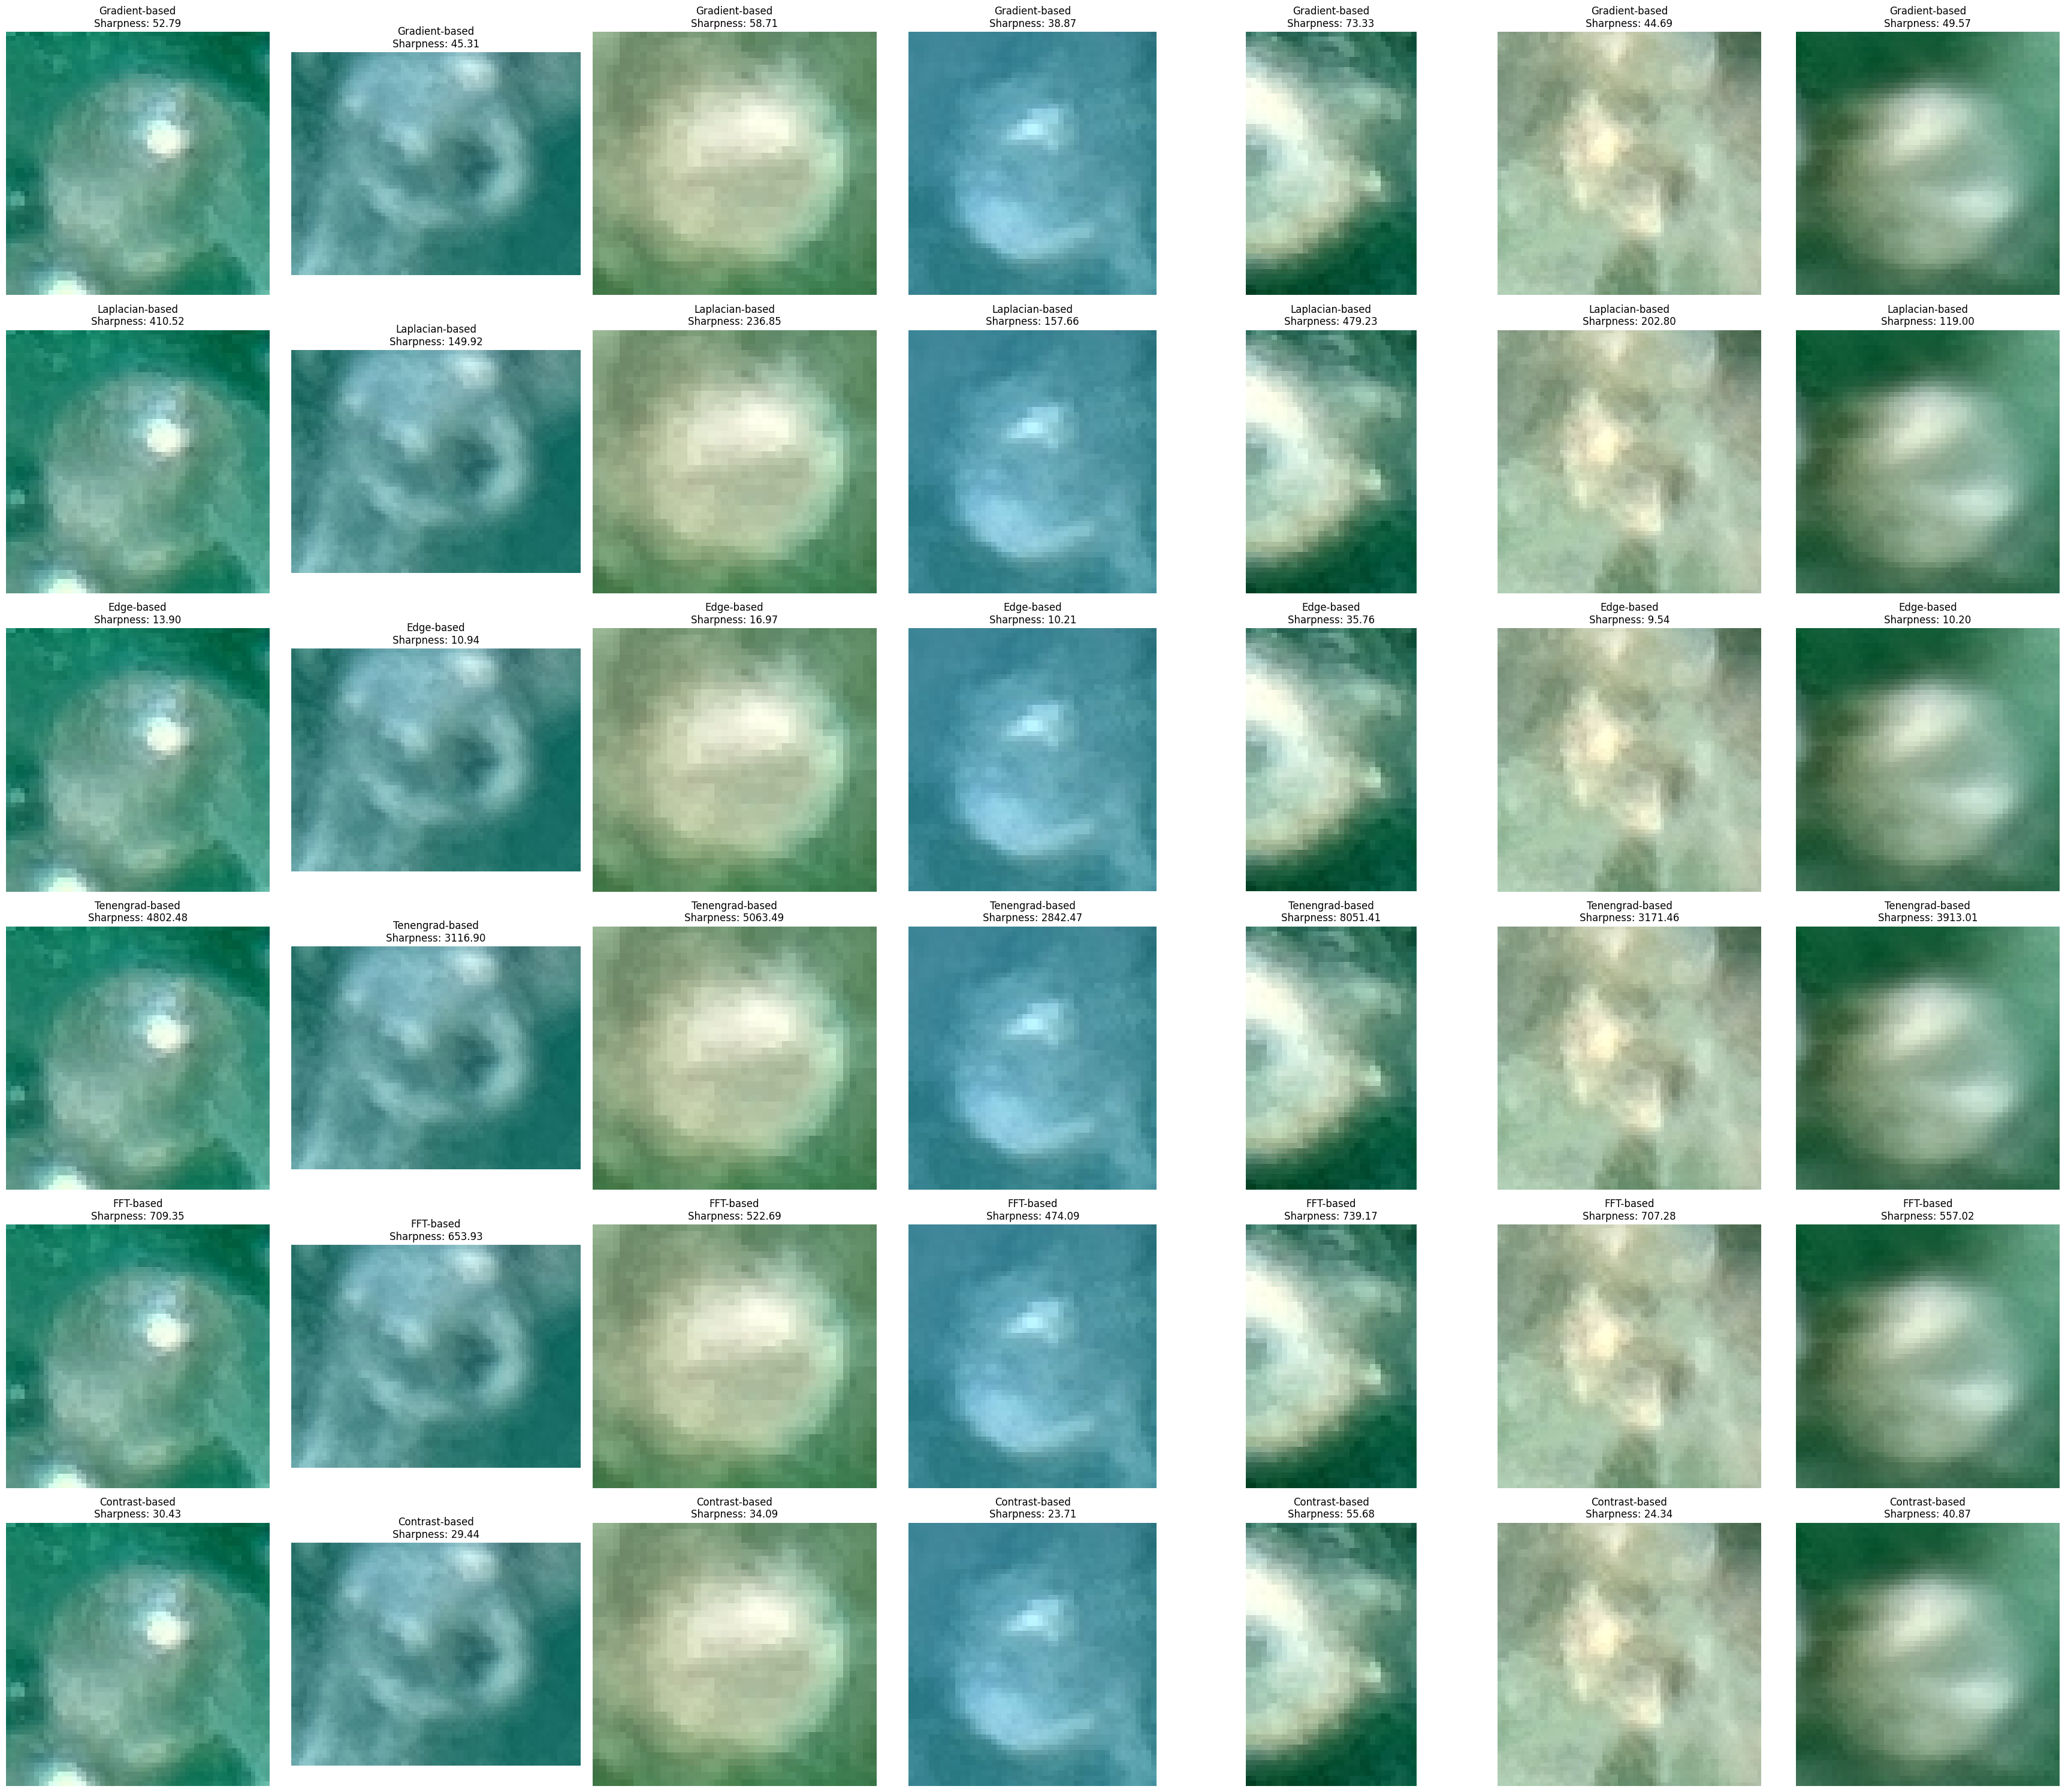

------------------ Sharpness Comparison for cloudy Class ------------------


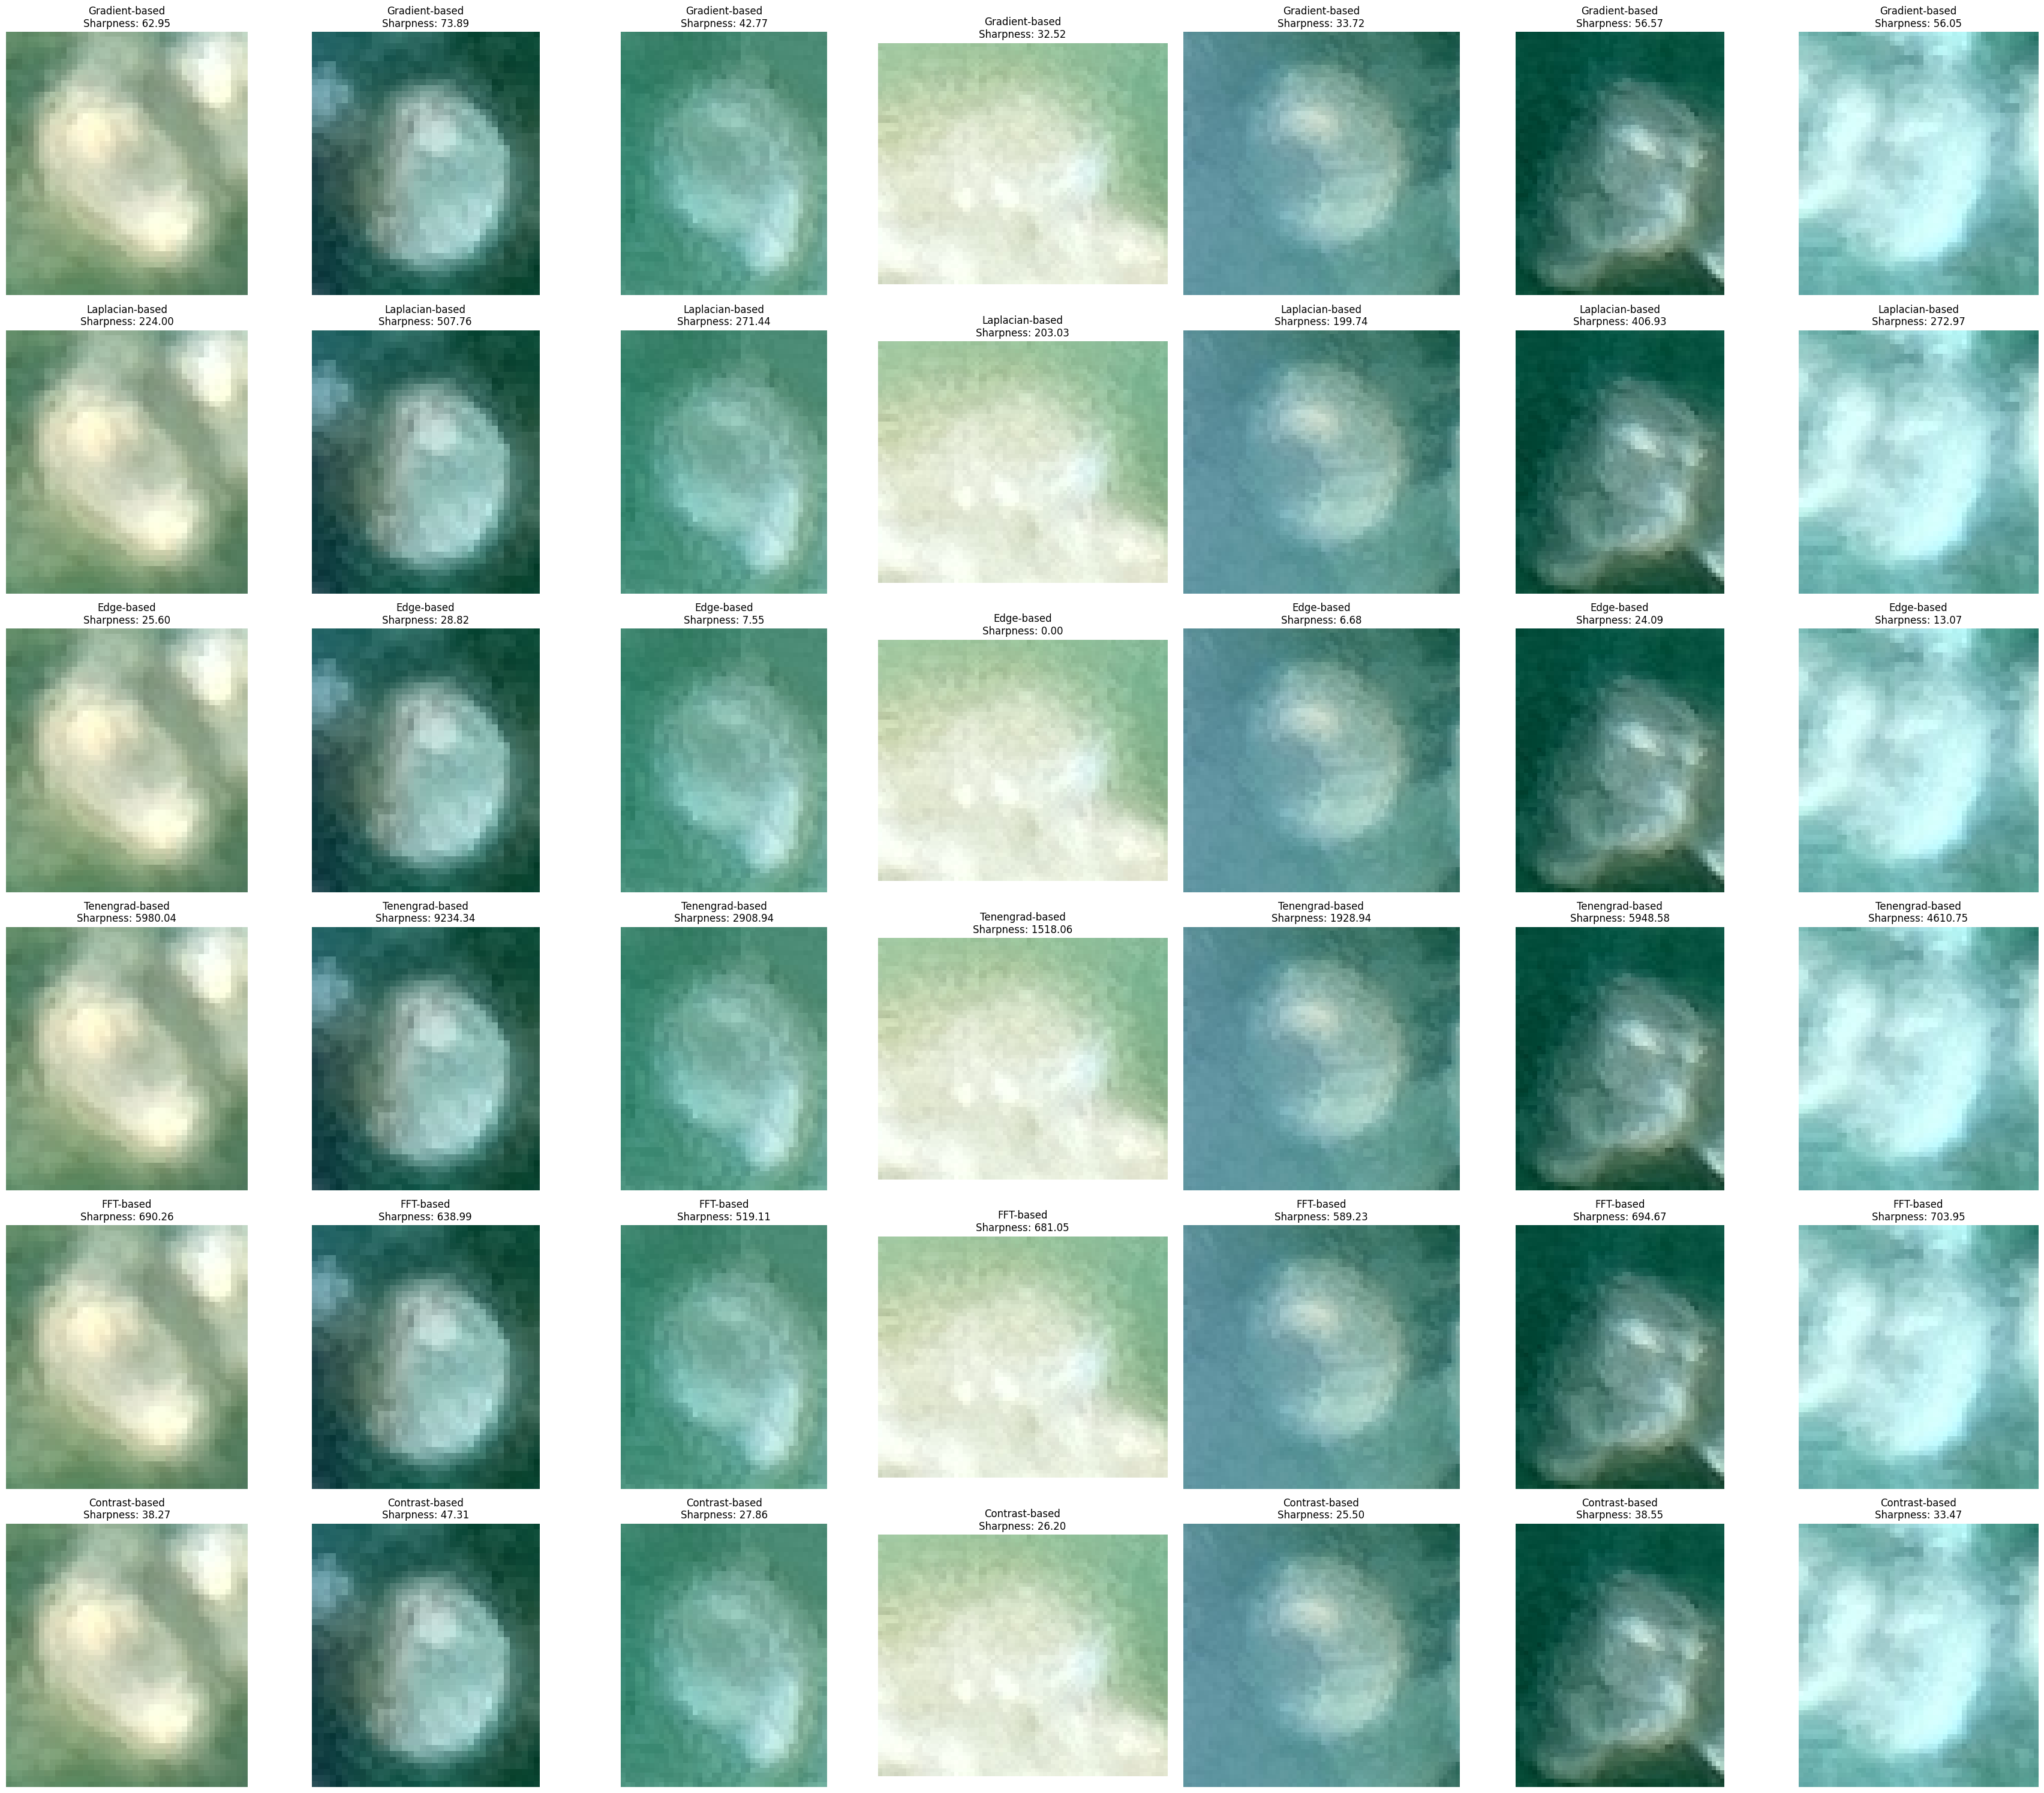

------------------ Sharpness Comparison for amber Class ------------------


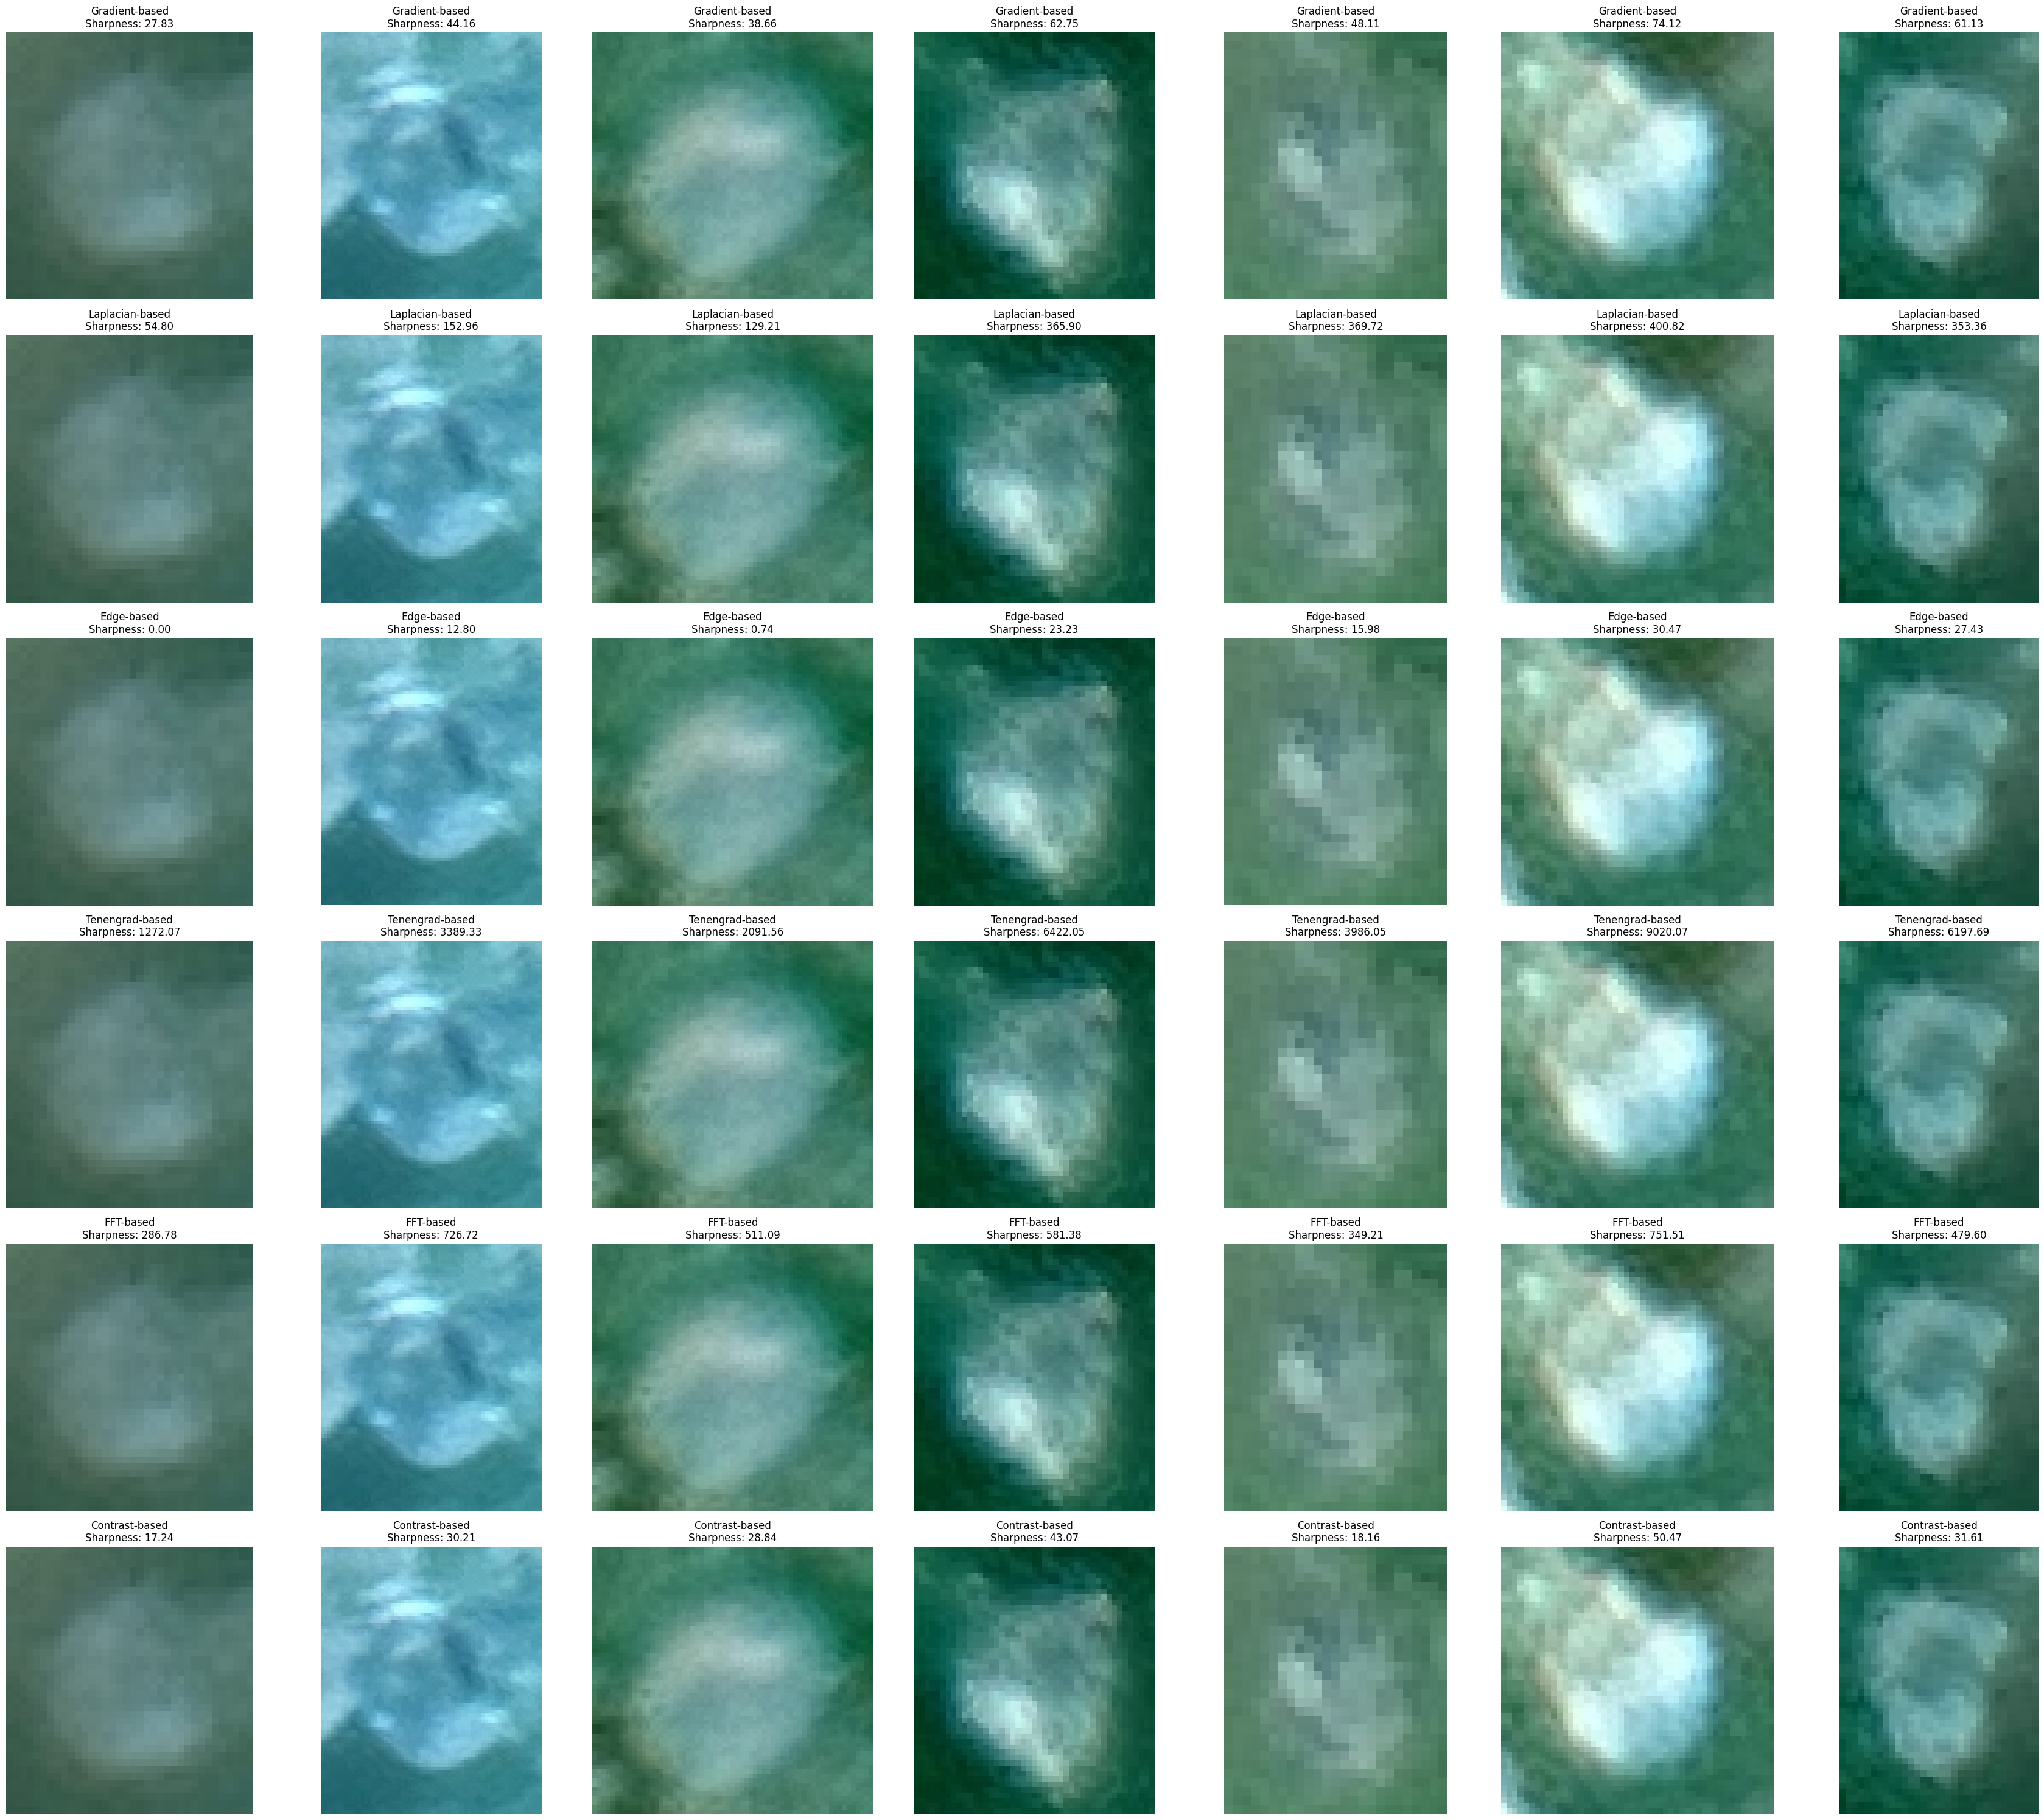

In [2]:
# Dataset path
trichomes_dataset_path = "/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125"

# Perform sharpness comparison across all classes
compare_sharpness_across_classes(trichomes_dataset_path, num_samples=7)

It can be seen that the edge sharpness works the best on those images as it can distinguish by images that are good quality and bad quality best.

Now lets see the results of the `edge_sharpness` on multiple trichome patches images.

In [3]:
# Function to sample images from a class folder
def sample_images_from_class_folder(class_folder, num_samples=30):
    all_images = os.listdir(class_folder)
    sampled_images = random.sample(all_images, num_samples)
    return [os.path.join(class_folder, img) for img in sampled_images]

# Function to plot 30 images with their edge sharpness values on a 6x5 grid
def plot_images_with_edge_sharpness(image_paths):
    num_images = len(image_paths)
    fig, axes = plt.subplots(6, 5, figsize=(20, 15))
    
    for idx, image_path in enumerate(image_paths):
        row = idx // 5
        col = idx % 5
        
        image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)  # Convert to grayscale for edge detection
        sharpness_value = edge_sharpness(image)
        
        ax = axes[row, col]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f"Sharpness: {sharpness_value:.2f}")
    
    plt.tight_layout()
    plt.show()

# Function to sample and plot images from a class folder
def assess_edge_sharpness_for_class(class_folder, num_samples=30):
    sampled_images = sample_images_from_class_folder(class_folder, num_samples)
    plot_images_with_edge_sharpness(sampled_images)


------------------ Edge Sharpness Assessment for clear Class ------------------


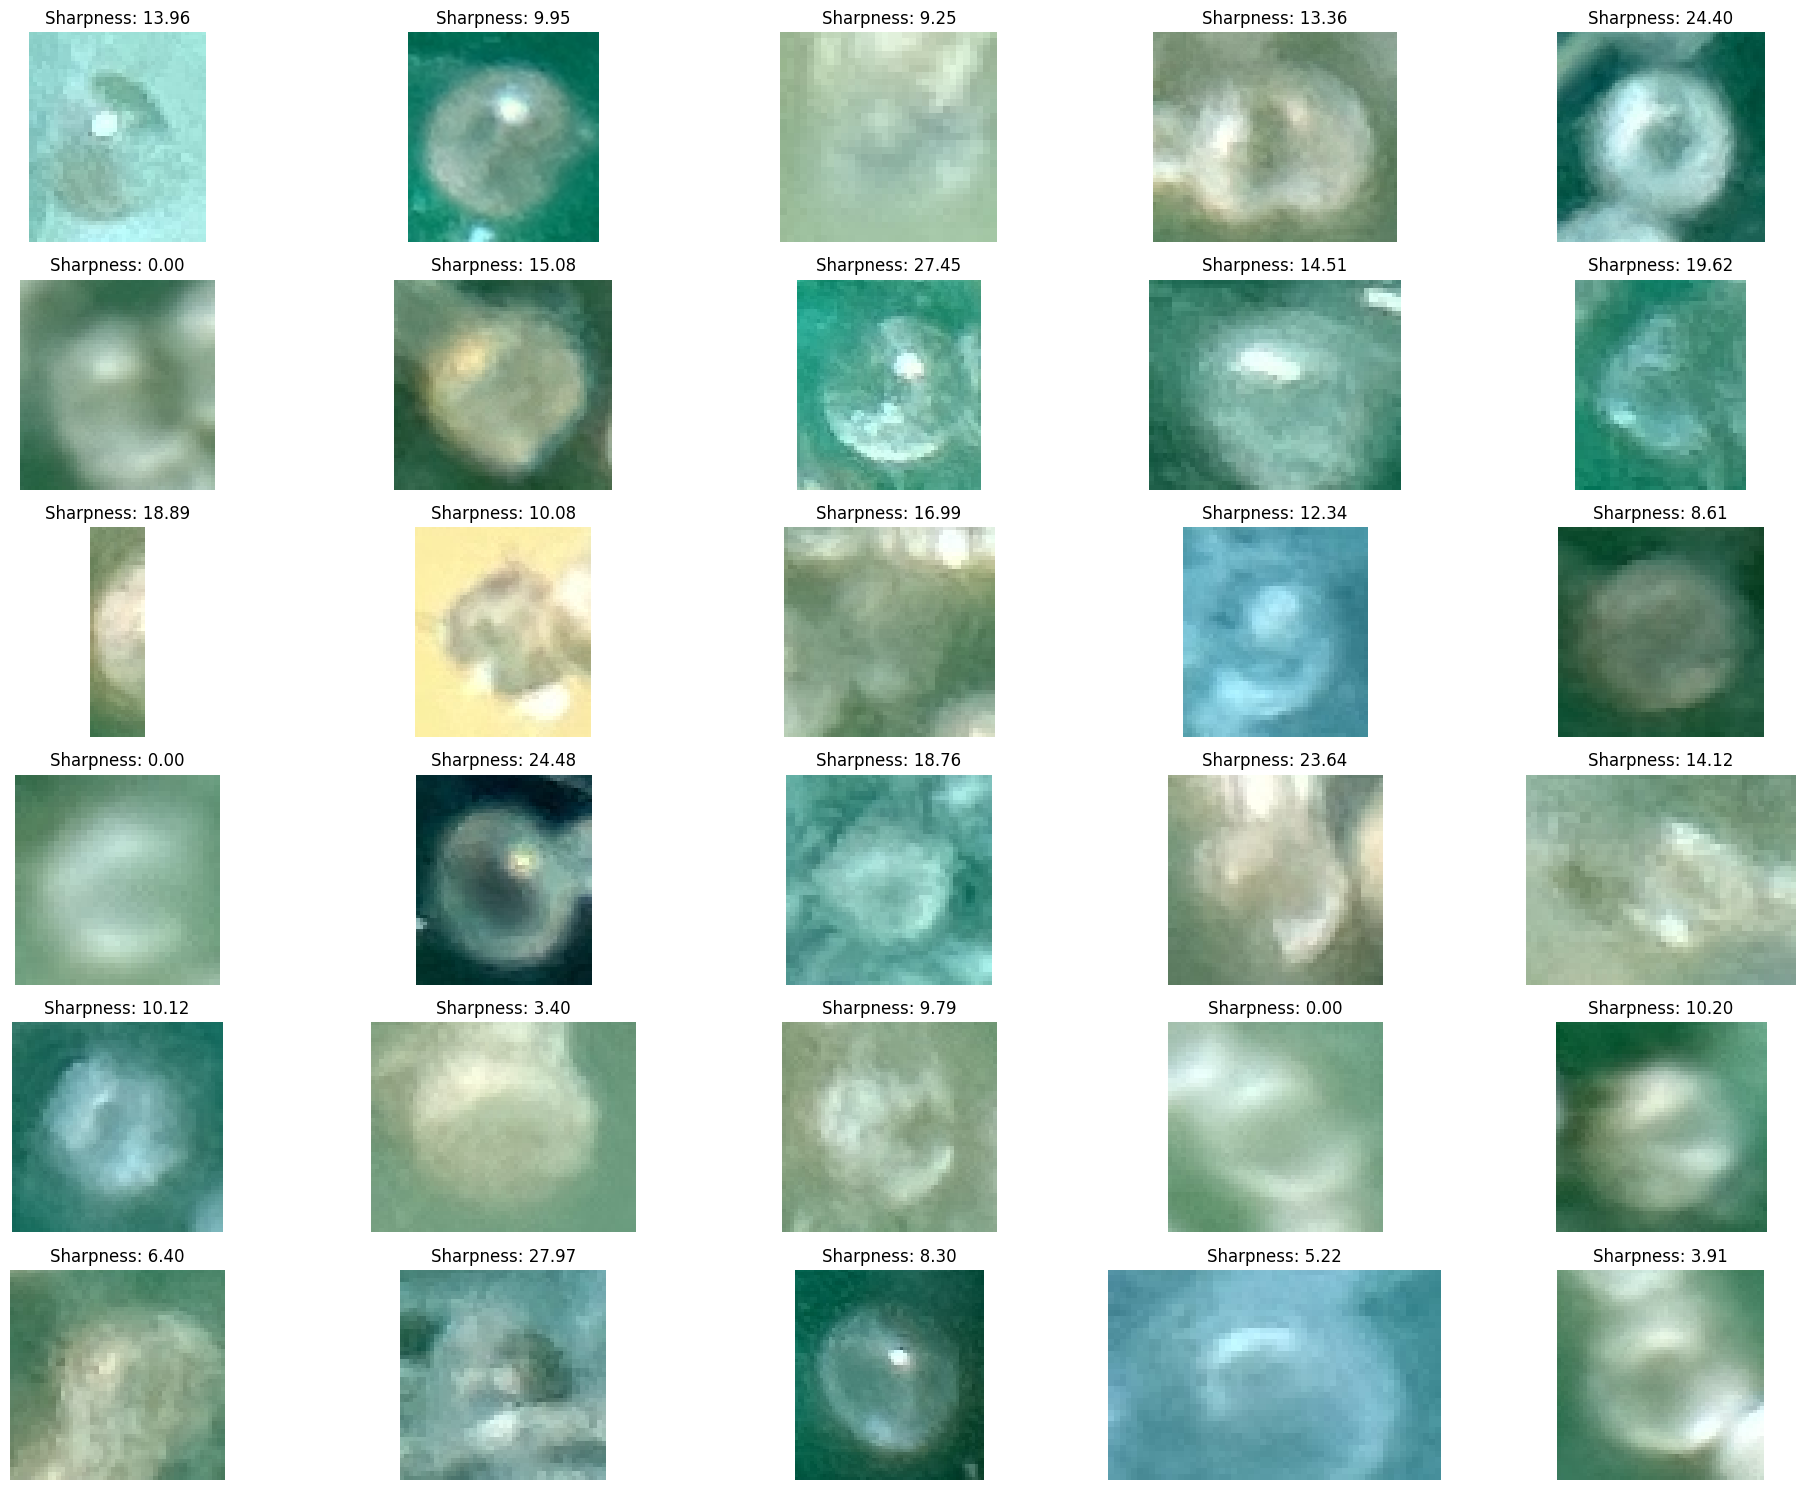

------------------ Edge Sharpness Assessment for cloudy Class ------------------


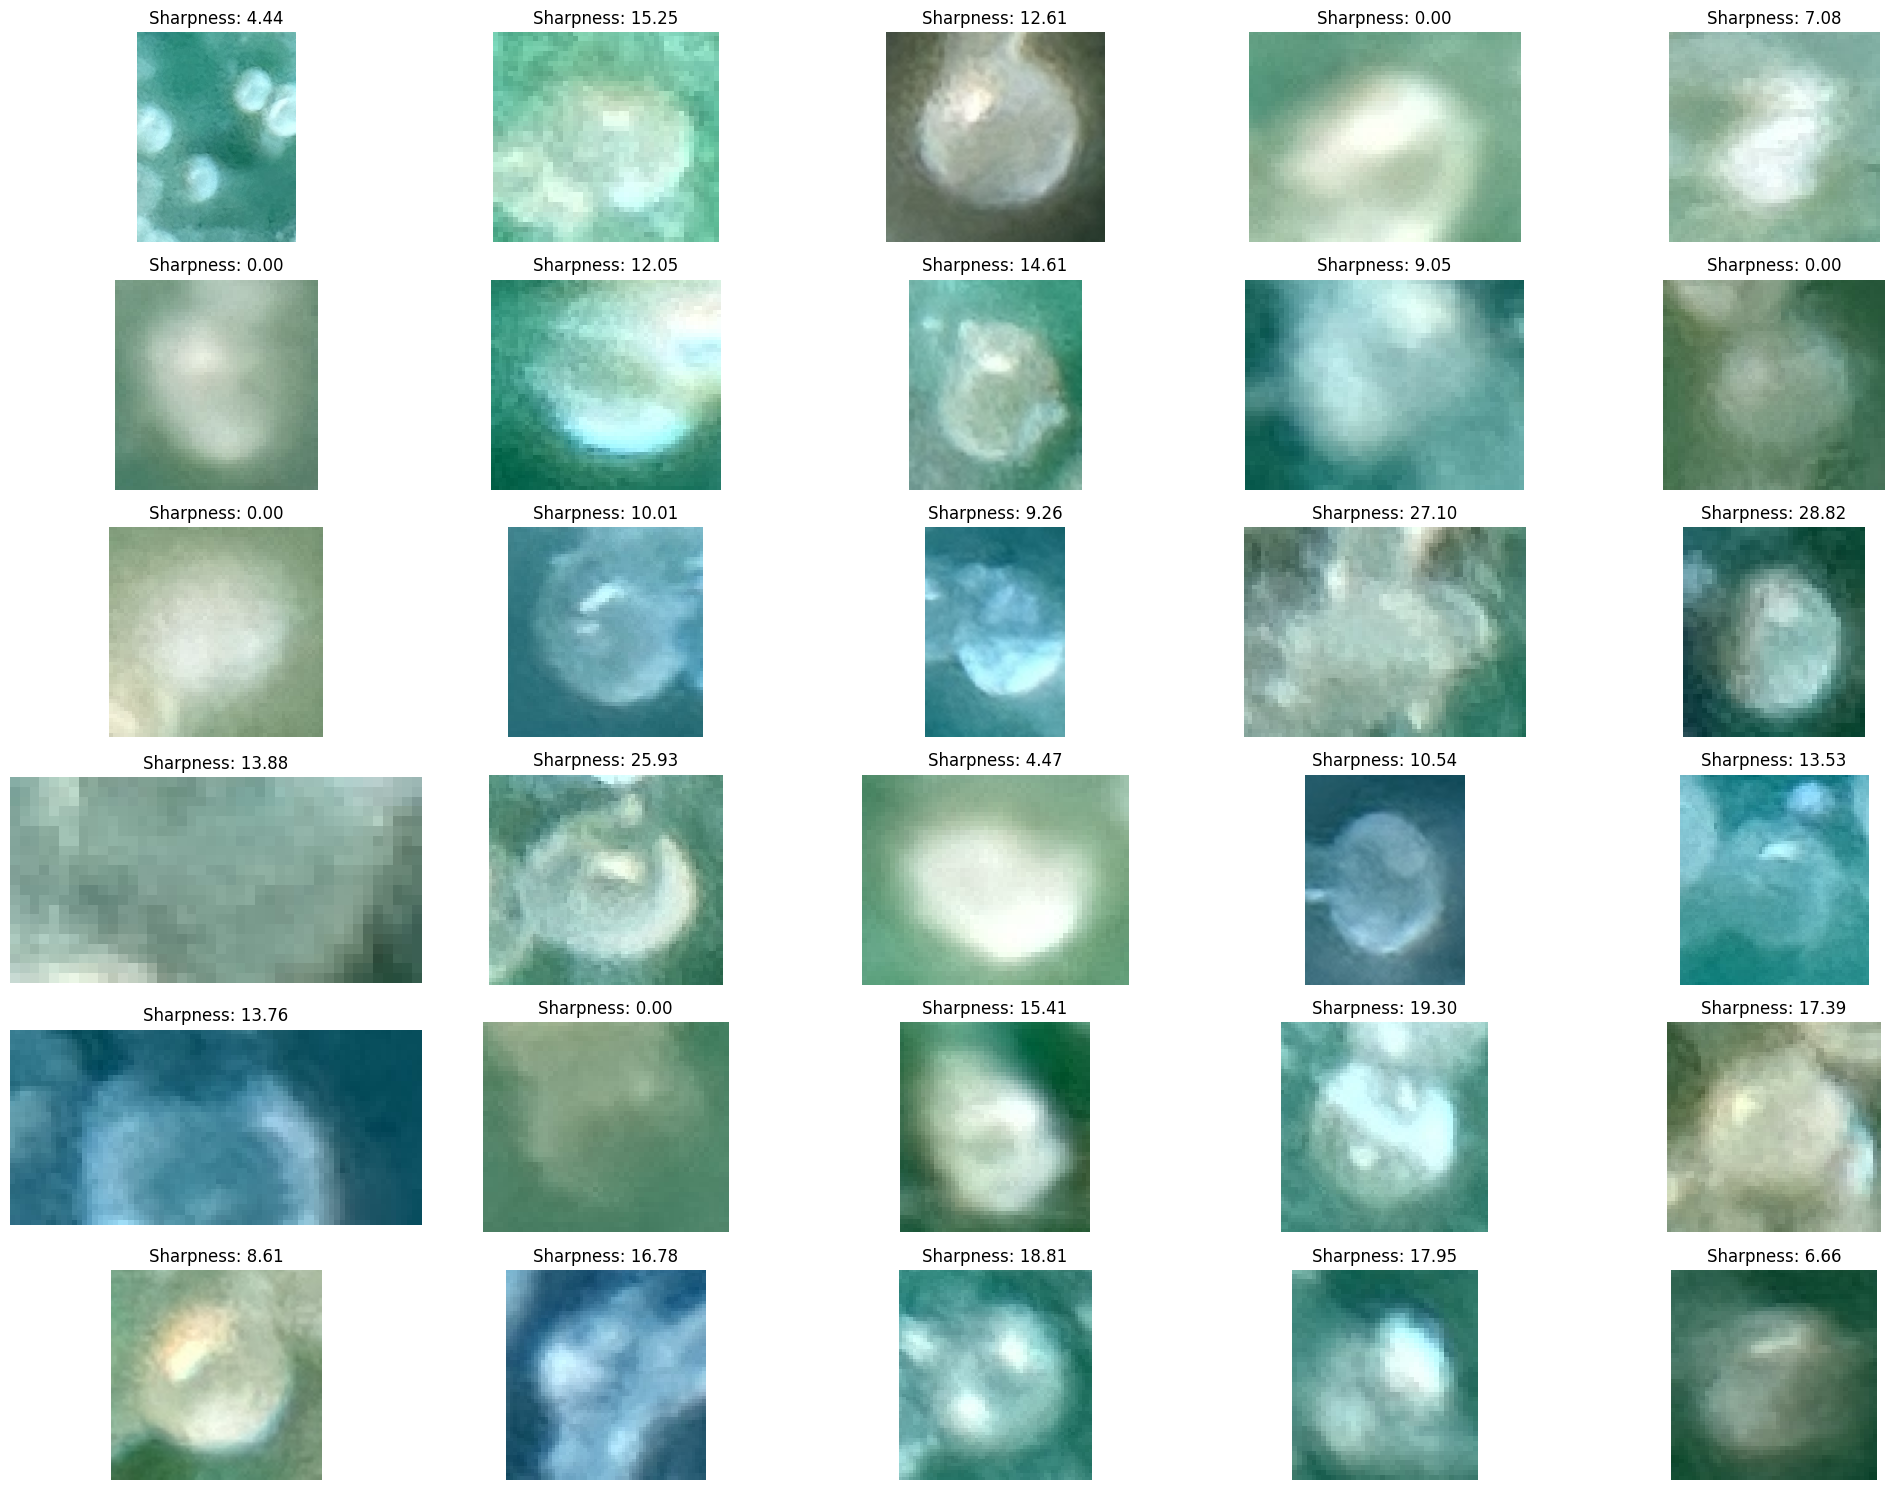

------------------ Edge Sharpness Assessment for amber Class ------------------


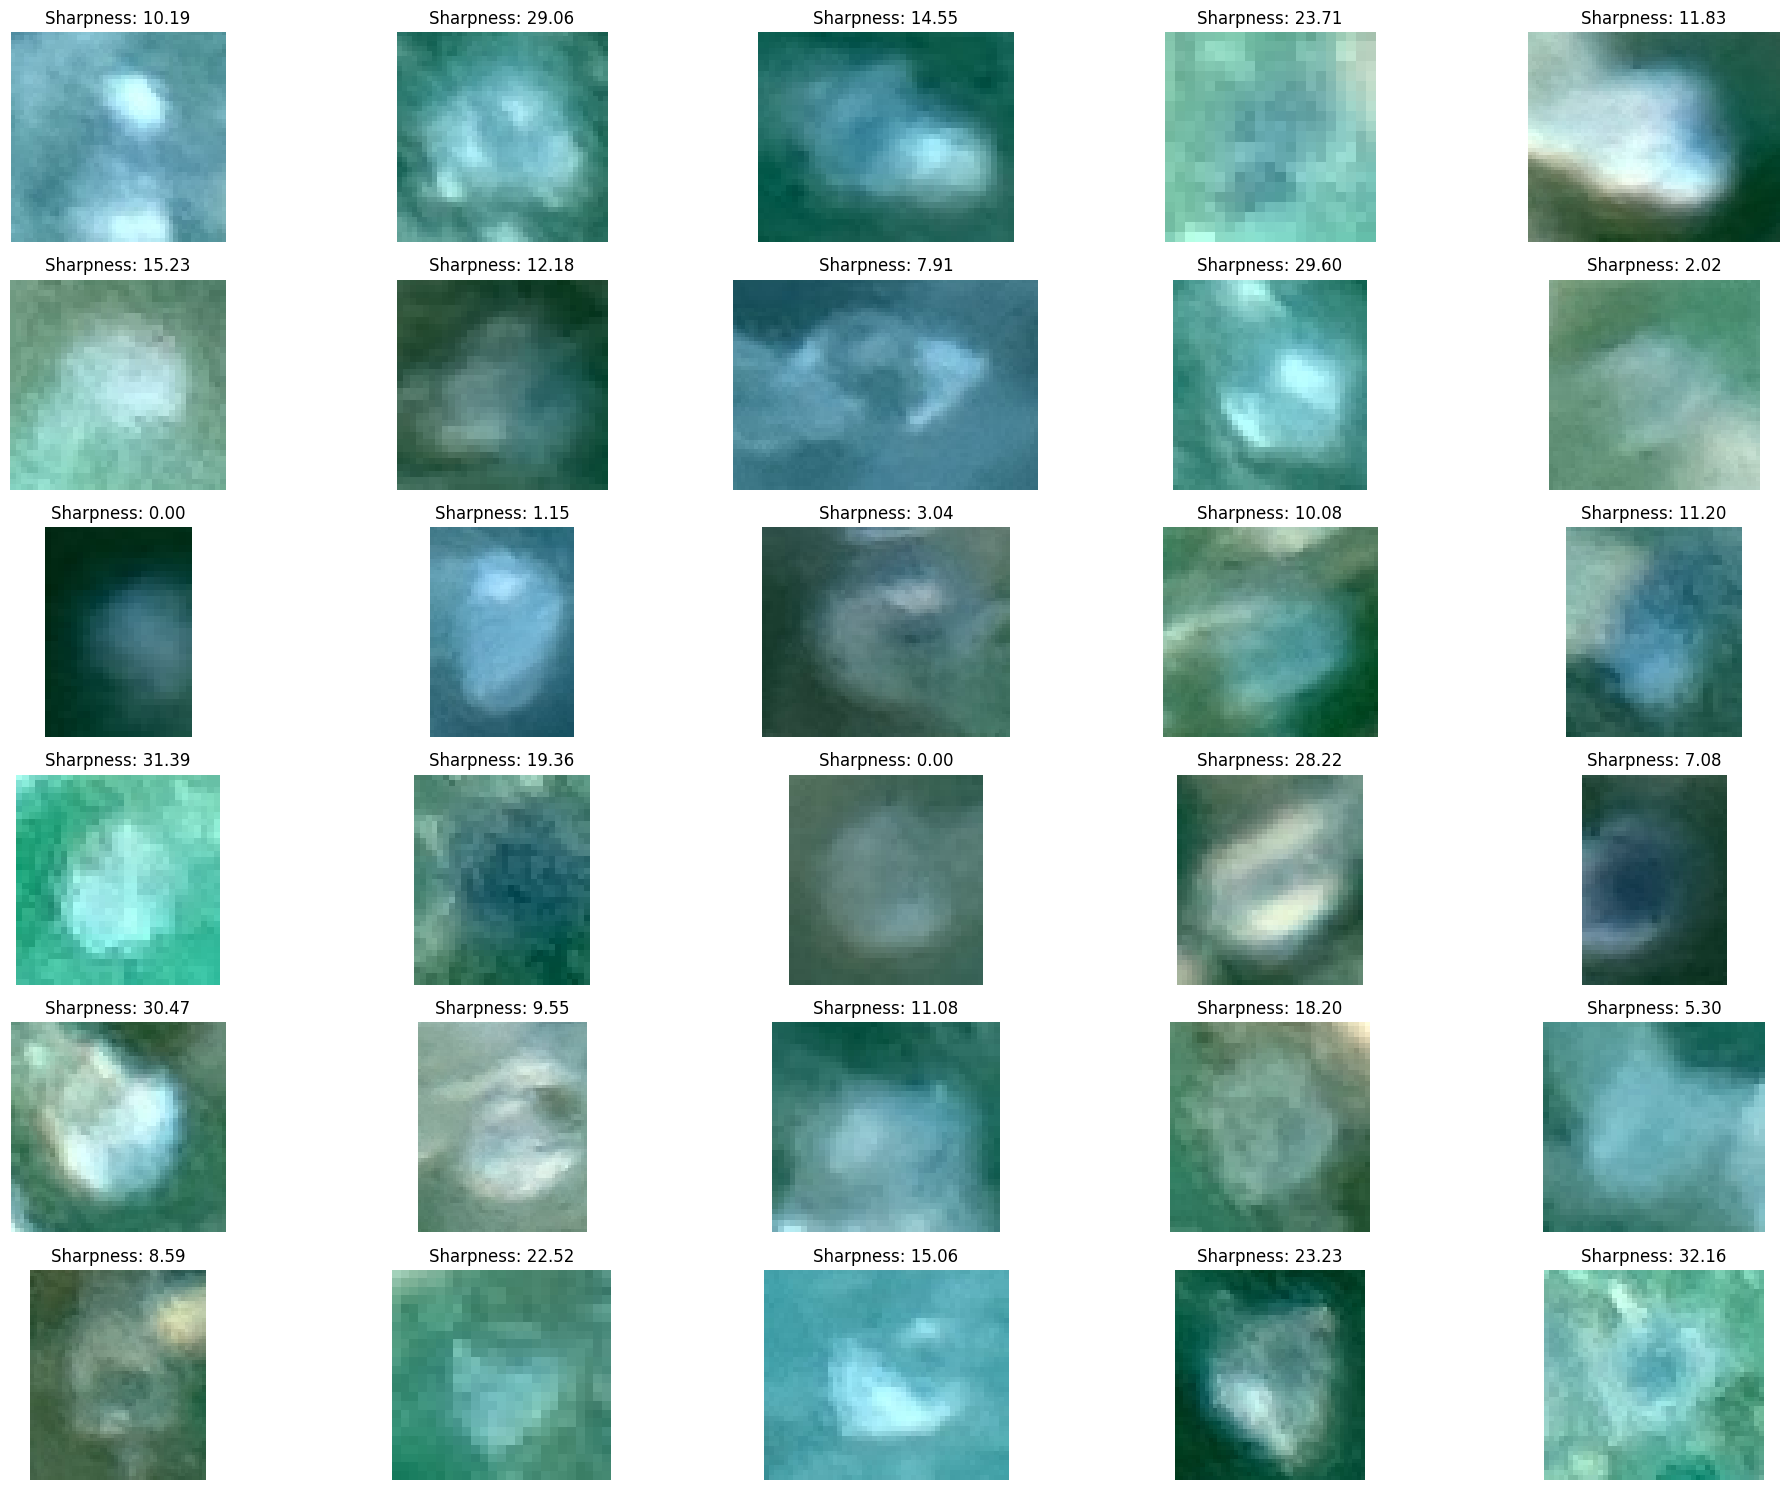

In [4]:
classes = ['clear', 'cloudy', 'amber']
for trichome_class in classes:
    class_folder = f"/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125/{trichome_class}"
    print(f"------------------ Edge Sharpness Assessment for {trichome_class} Class ------------------")
    assess_edge_sharpness_for_class(class_folder, num_samples=30)


Plot the Dist of sharpness for each of the classes images

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.data_preparation.sharpness_assessment import edge_sharpness

# Function to get all images from a class folder
def get_all_images_from_class_folder(class_folder):
    all_images = [os.path.join(class_folder, img) for img in os.listdir(class_folder)]
    return all_images

# Function to calculate edge sharpness for a list of images
def calculate_sharpness_values(image_paths):
    sharpness_values = []
    for image_path in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for edge detection
        sharpness_value = edge_sharpness(image)
        sharpness_values.append(sharpness_value)
    return sharpness_values

# Function to plot the distribution of sharpness values for a class
def plot_sharpness_distribution(sharpness_values, class_name):
    plt.figure(figsize=(10, 6))
    plt.hist(sharpness_values, bins=15, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Sharpness Distribution for {class_name} Class")
    plt.xlabel("Edge Sharpness Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Function to assess and plot sharpness distribution for a class
def assess_and_plot_sharpness_distribution_for_all_images(class_folder, class_name):
    all_images = get_all_images_from_class_folder(class_folder)
    sharpness_values = calculate_sharpness_values(all_images)
    plot_sharpness_distribution(sharpness_values, class_name)


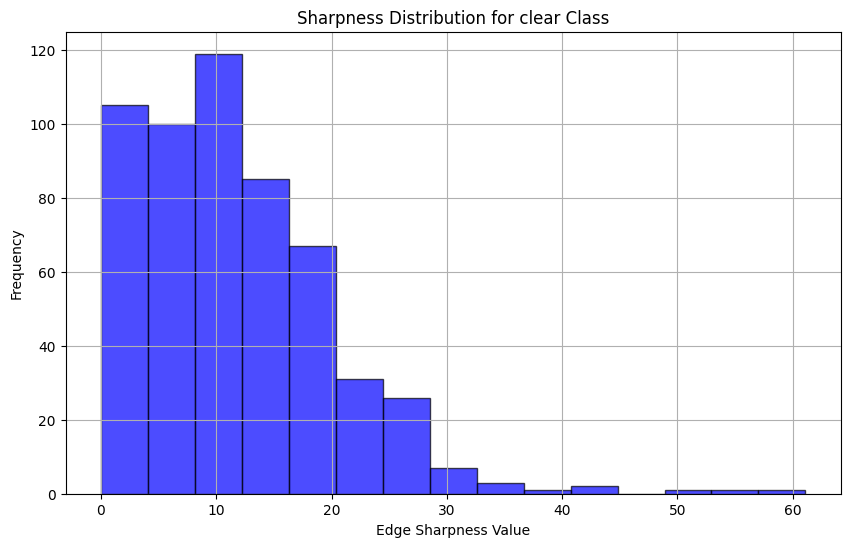

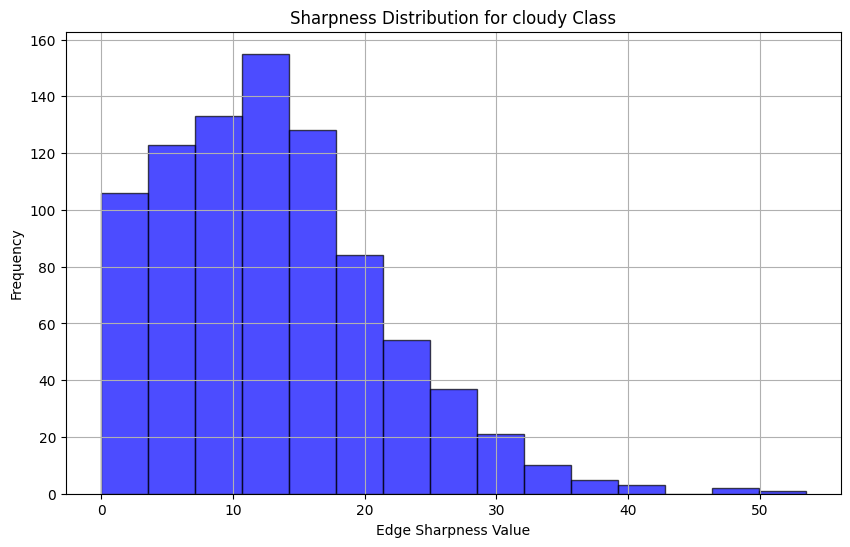

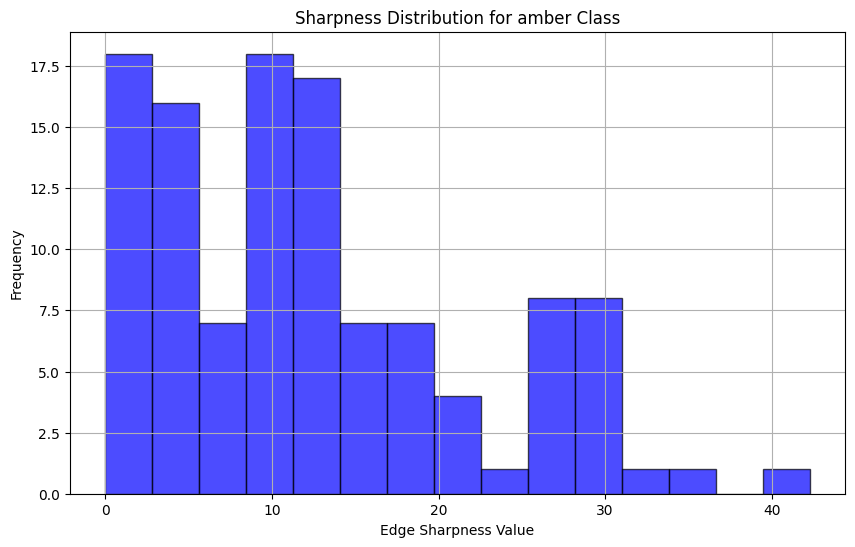

In [17]:
# Paths to your dataset for each class
dataset_path = "/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125"
class_folders = {
    "clear": os.path.join(dataset_path, "clear"),
    "cloudy": os.path.join(dataset_path, "cloudy"),
    "amber": os.path.join(dataset_path, "amber")
}

# Assess and plot sharpness distribution for all images in each class
for class_name, class_folder in class_folders.items():
    assess_and_plot_sharpness_distribution_for_all_images(class_folder, class_name)


In [6]:
import os
import cv2
import numpy as np
import shutil
from src.data_preparation.sharpness_assessment import edge_sharpness

# Function to get all images from a class folder
def get_all_images_from_class_folder(class_folder):
    all_images = [os.path.join(class_folder, img) for img in os.listdir(class_folder)]
    return all_images

# Function to calculate edge sharpness for a list of images
def calculate_sharpness_values(image_paths):
    sharpness_values = []
    for image_path in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for edge detection
        sharpness_value = edge_sharpness(image)
        sharpness_values.append((image_path, sharpness_value))
    return sharpness_values

# Function to filter images by sharpness and save them to a specified path
def filter_and_save_images(sharpness_values, threshold, save_path):
    """
    Filters images based on sharpness threshold and saves them to the specified directory.

    Args:
    - sharpness_values (list of tuples): List of tuples containing image paths and their sharpness values.
    - threshold (float): Sharpness threshold to filter images.
    - save_path (str): Path to save the filtered images.
    """
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    for image_path, sharpness in sharpness_values:
        if sharpness >= threshold:
            # Copy the image to the destination path
            shutil.copy(image_path, save_path)

# Function to assess, filter, and save images based on sharpness
def assess_filter_and_save_images(class_folder, class_name, thresholds, save_dir):
    all_images = get_all_images_from_class_folder(class_folder)
    sharpness_values = calculate_sharpness_values(all_images)
    
    # Save filtered images for each threshold
    for threshold_name, threshold_value in thresholds.items():
        save_path = os.path.join(save_dir, f"{class_name}_{threshold_name.replace(' ', '_')}")
        filter_and_save_images(sharpness_values, threshold_value, save_path)
        print(f"Filtered images saved to {save_path}")

In [9]:
# Paths to your dataset for each class
dataset_path = "/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125"
class_folders = {
    "clear": os.path.join(dataset_path, "clear"),
    "cloudy": os.path.join(dataset_path, "cloudy"),
    "amber": os.path.join(dataset_path, "amber")
}

# Directory to save filtered images
save_dir = os.path.join(dataset_path, "filtered_images")  # Replace with your desired path

thresholds = {
    'Clear': 20,
    'Cloudy': 20,
    'Amber': 30,
}
for class_name, class_folder in class_folders.items():
    assess_filter_and_save_images(class_folder, class_name, thresholds, save_dir)


Filtered images saved to /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125/filtered_images/clear_Clear
Filtered images saved to /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125/filtered_images/clear_Cloudy
Filtered images saved to /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125/filtered_images/clear_Amber
Filtered images saved to /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125/filtered_images/cloudy_Clear
Filtered images saved to /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/ground_truth_trichomes_datasets/trichome_dataset_125/filtered_images/cloudy_Clo